In [1]:
# Writer : JESOON KANG, Dept. of Computer Science & Engineering in Chung-Ang University
# Last-Modified Date : April 17,2020

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
from random import *

In [3]:
### Setting up Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Below codes activates when want to use cpu
#device = torch.device('cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce RTX 2060 SUPER
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


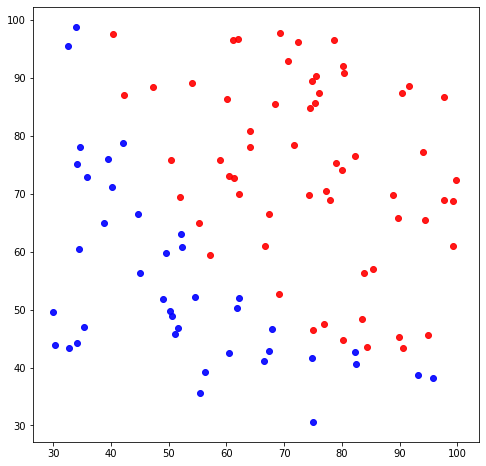

In [4]:
# Plot the training data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.9, c='b')
plt.scatter(x_label1, y_label1, alpha=0.9, c='r')
plt.show()

In [5]:
x = torch.FloatTensor(x).to('cuda')
y = torch.FloatTensor(y).to('cuda')
label = torch.FloatTensor(label).to('cuda')

x_label0 = torch.FloatTensor(x_label0).to('cuda')
x_label1 = torch.FloatTensor(x_label1).to('cuda')

y_label0 = torch.FloatTensor(y_label0).to('cuda')
y_label1 = torch.FloatTensor(y_label1).to('cuda')


In [12]:
# Initialize thetas 
th0 = torch.FloatTensor([-1.0]).to('cuda')
th1 = torch.FloatTensor([10.0]).to('cuda')
th2 = torch.FloatTensor([10.0]).to('cuda')

def sigmoid(z) :
    return torch.reciprocal(torch.sum(1 + torch.exp(z)))

# Setting Step-size. (Learning-rate)
lr = 0.001

# Setting converge value
loss_conv = 1e-8 # loss converge standard

# Lists for logging
loss_log = []
th0_log = []
th1_log = []
th2_log = []
epoch_log = []
conv_count = 0 # Variable To count converge
epoch = 0 # Inital epoch value

test_loss_log = []


while (True) :
    epoch +=1
    epoch_log.append(epoch)
    
    ## Training 
    # Get Train yh
    z = th0 + th1*x + th2*y
    activ = 1 / (1+torch.exp(-z))
    
    m = len(activ)
    
    # Get Loss 
    loss = (1/m) * torch.sum( \
                             -label*torch.log(activ) - (1-label)*torch.log(1 - activ) )
    
    
    # Logging
    loss_log.append(loss)
    th0_log.append(th0)
    th1_log.append(th1)
    th2_log.append(th2)
    
    
    # Updating Parameters - Gradient Descent
    th0 = th0 - lr * (1/m) * torch.sum(activ - label)
    th1 = th1 - lr * (1/m) * torch.sum((activ-label)*x)
    th2 = th2 - lr * (1/m) * torch.sum((activ-label)*y)
    
    
    ## Does Train Loss Converged?
    if len(loss_log) > 2 :
        if abs(loss_log[-1] - loss_log[-2]) < loss_conv :
            conv_count += 1
        else :
            conv_count = 0
    
    # For monitor
    
    if epoch %1000 == 0 :
        acc = 0
        for i in range(0,len(activ)) :
            if activ[i] >= 0.5 :
                if label[i] == 1 :
                    acc += 1
            else :
                if label[i] == 0 :
                    acc += 1
        acc = acc / len(activ)
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, loss {:.10f}, acc {:.3f}".\
              format(epoch,th0.item(),th1.item(),th2.item(),loss_log[-1],acc) )
     
    ## Escape if Training loss is converged
    if conv_count > 3 :
        print("Loss is converged")
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, loss {:.10f}, acc {:.3f}".\
              format(epoch,th0.item(),th1.item(),th2.item(),loss_log[-1],acc))                 
        break



epoch 1000, th0 -1.21873, th1 0.01897, th2 0.009961, loss 0.5510989428, acc 0.650
epoch 2000, th0 -1.27786, th1 0.01939, th2 0.010424, loss 0.5476021171, acc 0.650
epoch 3000, th0 -1.33650, th1 0.01980, th2 0.010883, loss 0.5441636443, acc 0.650
epoch 4000, th0 -1.39464, th1 0.02022, th2 0.011339, loss 0.5407823920, acc 0.660
epoch 5000, th0 -1.45230, th1 0.02063, th2 0.011790, loss 0.5374571681, acc 0.660
epoch 6000, th0 -1.50948, th1 0.02103, th2 0.012239, loss 0.5341870785, acc 0.660
epoch 7000, th0 -1.56619, th1 0.02144, th2 0.012683, loss 0.5309708118, acc 0.660
epoch 8000, th0 -1.62243, th1 0.02184, th2 0.013124, loss 0.5278074741, acc 0.660
epoch 9000, th0 -1.67821, th1 0.02224, th2 0.013562, loss 0.5246959329, acc 0.660
epoch 10000, th0 -1.73353, th1 0.02263, th2 0.013995, loss 0.5216350555, acc 0.660
epoch 11000, th0 -1.78840, th1 0.02303, th2 0.014426, loss 0.5186238885, acc 0.660
epoch 12000, th0 -1.84282, th1 0.02342, th2 0.014853, loss 0.5156615973, acc 0.670
epoch 13000, 

epoch 100000, th0 -5.38160, th1 0.04960, th2 0.042676, loss 0.3692493737, acc 0.910
epoch 101000, th0 -5.41170, th1 0.04983, th2 0.042913, loss 0.3683395684, acc 0.910
epoch 102000, th0 -5.44174, th1 0.05005, th2 0.043149, loss 0.3674363196, acc 0.910
epoch 103000, th0 -5.47178, th1 0.05028, th2 0.043386, loss 0.3665376902, acc 0.910
epoch 104000, th0 -5.50143, th1 0.05051, th2 0.043619, loss 0.3656552136, acc 0.910
epoch 105000, th0 -5.53100, th1 0.05073, th2 0.043852, loss 0.3647799194, acc 0.910
epoch 106000, th0 -5.56056, th1 0.05096, th2 0.044085, loss 0.3639090657, acc 0.910
epoch 107000, th0 -5.58982, th1 0.05118, th2 0.044315, loss 0.3630517125, acc 0.910
epoch 108000, th0 -5.61890, th1 0.05140, th2 0.044544, loss 0.3622035086, acc 0.910
epoch 109000, th0 -5.64799, th1 0.05163, th2 0.044773, loss 0.3613595963, acc 0.910
epoch 110000, th0 -5.67689, th1 0.05185, th2 0.045000, loss 0.3605252504, acc 0.910
epoch 111000, th0 -5.70550, th1 0.05206, th2 0.045226, loss 0.3597033620, ac

epoch 198000, th0 -7.77752, th1 0.06805, th2 0.061575, loss 0.3098130226, acc 0.920
epoch 199000, th0 -7.79755, th1 0.06820, th2 0.061734, loss 0.3094128072, acc 0.920
epoch 200000, th0 -7.81757, th1 0.06836, th2 0.061892, loss 0.3090139329, acc 0.920
epoch 201000, th0 -7.83760, th1 0.06852, th2 0.062050, loss 0.3086164892, acc 0.920
epoch 202000, th0 -7.85730, th1 0.06867, th2 0.062206, loss 0.3082269430, acc 0.920
epoch 203000, th0 -7.87685, th1 0.06882, th2 0.062361, loss 0.3078415990, acc 0.920
epoch 204000, th0 -7.89640, th1 0.06897, th2 0.062516, loss 0.3074575365, acc 0.920
epoch 205000, th0 -7.91595, th1 0.06913, th2 0.062670, loss 0.3070747554, acc 0.920
epoch 206000, th0 -7.93550, th1 0.06928, th2 0.062825, loss 0.3066932559, acc 0.920
epoch 207000, th0 -7.95505, th1 0.06943, th2 0.062980, loss 0.3063130379, acc 0.920
epoch 208000, th0 -7.97460, th1 0.06958, th2 0.063134, loss 0.3059341311, acc 0.920
epoch 209000, th0 -7.99393, th1 0.06973, th2 0.063287, loss 0.3055607677, ac

epoch 296000, th0 -9.46789, th1 0.08128, th2 0.074979, loss 0.2804522514, acc 0.910
epoch 297000, th0 -9.48315, th1 0.08140, th2 0.075101, loss 0.2802241147, acc 0.910
epoch 298000, th0 -9.49841, th1 0.08152, th2 0.075222, loss 0.2799965143, acc 0.910
epoch 299000, th0 -9.51367, th1 0.08164, th2 0.075343, loss 0.2797695398, acc 0.910
epoch 300000, th0 -9.52893, th1 0.08176, th2 0.075465, loss 0.2795431316, acc 0.910
epoch 301000, th0 -9.54406, th1 0.08188, th2 0.075585, loss 0.2793192565, acc 0.910
epoch 302000, th0 -9.55836, th1 0.08199, th2 0.075699, loss 0.2791080773, acc 0.910
epoch 303000, th0 -9.57267, th1 0.08210, th2 0.075813, loss 0.2788974643, acc 0.910
epoch 304000, th0 -9.58697, th1 0.08221, th2 0.075926, loss 0.2786873281, acc 0.910
epoch 305000, th0 -9.60128, th1 0.08233, th2 0.076040, loss 0.2784776986, acc 0.910
epoch 306000, th0 -9.61558, th1 0.08244, th2 0.076154, loss 0.2782685757, acc 0.910
epoch 307000, th0 -9.62989, th1 0.08255, th2 0.076268, loss 0.2780599892, ac

epoch 393000, th0 -10.76643, th1 0.09151, th2 0.085324, loss 0.2630128562, acc 0.910
epoch 394000, th0 -10.77883, th1 0.09161, th2 0.085423, loss 0.2628642321, acc 0.910
epoch 395000, th0 -10.79122, th1 0.09171, th2 0.085522, loss 0.2627159357, acc 0.910
epoch 396000, th0 -10.80362, th1 0.09181, th2 0.085620, loss 0.2625679374, acc 0.910
epoch 397000, th0 -10.81512, th1 0.09190, th2 0.085712, loss 0.2624309361, acc 0.910
epoch 398000, th0 -10.82656, th1 0.09199, th2 0.085804, loss 0.2622949183, acc 0.910
epoch 399000, th0 -10.83801, th1 0.09208, th2 0.085895, loss 0.2621591091, acc 0.910
epoch 400000, th0 -10.84945, th1 0.09217, th2 0.085986, loss 0.2620235682, acc 0.910
epoch 401000, th0 -10.86090, th1 0.09226, th2 0.086078, loss 0.2618883252, acc 0.910
epoch 402000, th0 -10.87234, th1 0.09235, th2 0.086169, loss 0.2617533207, acc 0.910
epoch 403000, th0 -10.88379, th1 0.09244, th2 0.086260, loss 0.2616185844, acc 0.910
epoch 404000, th0 -10.89523, th1 0.09253, th2 0.086352, loss 0.26

epoch 490000, th0 -11.83058, th1 0.09993, th2 0.093830, loss 0.2513322830, acc 0.910
epoch 491000, th0 -11.84011, th1 0.10001, th2 0.093906, loss 0.2512368858, acc 0.910
epoch 492000, th0 -11.84965, th1 0.10008, th2 0.093983, loss 0.2511416078, acc 0.910
epoch 493000, th0 -11.85919, th1 0.10016, th2 0.094059, loss 0.2510465086, acc 0.910
epoch 494000, th0 -11.86872, th1 0.10023, th2 0.094135, loss 0.2509515584, acc 0.910
epoch 495000, th0 -11.87826, th1 0.10031, th2 0.094212, loss 0.2508567870, acc 0.910
epoch 496000, th0 -11.88780, th1 0.10038, th2 0.094288, loss 0.2507621348, acc 0.910
epoch 497000, th0 -11.89733, th1 0.10046, th2 0.094364, loss 0.2506676316, acc 0.910
epoch 498000, th0 -11.90687, th1 0.10054, th2 0.094441, loss 0.2505733371, acc 0.910
epoch 499000, th0 -11.91641, th1 0.10061, th2 0.094517, loss 0.2504791319, acc 0.910
epoch 500000, th0 -11.92594, th1 0.10069, th2 0.094594, loss 0.2503851056, acc 0.910
epoch 501000, th0 -11.93548, th1 0.10076, th2 0.094670, loss 0.25

epoch 587000, th0 -12.72173, th1 0.10700, th2 0.100972, loss 0.2430539876, acc 0.900
epoch 588000, th0 -12.73031, th1 0.10707, th2 0.101041, loss 0.2429802120, acc 0.900
epoch 589000, th0 -12.73890, th1 0.10714, th2 0.101110, loss 0.2429065704, acc 0.900
epoch 590000, th0 -12.74748, th1 0.10720, th2 0.101179, loss 0.2428330183, acc 0.900
epoch 591000, th0 -12.75606, th1 0.10727, th2 0.101247, loss 0.2427595854, acc 0.900
epoch 592000, th0 -12.76465, th1 0.10734, th2 0.101316, loss 0.2426862419, acc 0.900
epoch 593000, th0 -12.77323, th1 0.10741, th2 0.101385, loss 0.2426130027, acc 0.900
epoch 594000, th0 -12.78181, th1 0.10748, th2 0.101454, loss 0.2425399274, acc 0.900
epoch 595000, th0 -12.79039, th1 0.10754, th2 0.101523, loss 0.2424669266, acc 0.900
epoch 596000, th0 -12.79898, th1 0.10761, th2 0.101592, loss 0.2423939854, acc 0.900
epoch 597000, th0 -12.80756, th1 0.10768, th2 0.101661, loss 0.2423211932, acc 0.900
epoch 598000, th0 -12.81614, th1 0.10775, th2 0.101730, loss 0.24

epoch 684000, th0 -13.50004, th1 0.11318, th2 0.107222, loss 0.2367882133, acc 0.890
epoch 685000, th0 -13.50766, th1 0.11324, th2 0.107283, loss 0.2367308140, acc 0.890
epoch 686000, th0 -13.51529, th1 0.11330, th2 0.107344, loss 0.2366735339, acc 0.890
epoch 687000, th0 -13.52292, th1 0.11336, th2 0.107406, loss 0.2366163433, acc 0.890
epoch 688000, th0 -13.53055, th1 0.11342, th2 0.107467, loss 0.2365592122, acc 0.890
epoch 689000, th0 -13.53818, th1 0.11348, th2 0.107528, loss 0.2365021408, acc 0.890
epoch 690000, th0 -13.54581, th1 0.11354, th2 0.107590, loss 0.2364451736, acc 0.890
epoch 691000, th0 -13.55344, th1 0.11361, th2 0.107651, loss 0.2363882512, acc 0.890
epoch 692000, th0 -13.56107, th1 0.11367, th2 0.107712, loss 0.2363314182, acc 0.890
epoch 693000, th0 -13.56870, th1 0.11373, th2 0.107774, loss 0.2362746596, acc 0.890
epoch 694000, th0 -13.57633, th1 0.11379, th2 0.107835, loss 0.2362179905, acc 0.890
epoch 695000, th0 -13.58396, th1 0.11385, th2 0.107896, loss 0.23

epoch 781000, th0 -14.18391, th1 0.11862, th2 0.112722, loss 0.2319369018, acc 0.890
epoch 782000, th0 -14.19059, th1 0.11867, th2 0.112775, loss 0.2318923473, acc 0.890
epoch 783000, th0 -14.19727, th1 0.11872, th2 0.112829, loss 0.2318478376, acc 0.890
epoch 784000, th0 -14.20394, th1 0.11878, th2 0.112883, loss 0.2318033725, acc 0.890
epoch 785000, th0 -14.21062, th1 0.11883, th2 0.112937, loss 0.2317589670, acc 0.890
epoch 786000, th0 -14.21729, th1 0.11888, th2 0.112990, loss 0.2317146063, acc 0.890
epoch 787000, th0 -14.22397, th1 0.11894, th2 0.113044, loss 0.2316703051, acc 0.890
epoch 788000, th0 -14.23064, th1 0.11899, th2 0.113098, loss 0.2316260487, acc 0.890
epoch 789000, th0 -14.23732, th1 0.11904, th2 0.113152, loss 0.2315818518, acc 0.890
epoch 790000, th0 -14.24400, th1 0.11910, th2 0.113205, loss 0.2315376997, acc 0.890
epoch 791000, th0 -14.25067, th1 0.11915, th2 0.113259, loss 0.2314936072, acc 0.890
epoch 792000, th0 -14.25735, th1 0.11920, th2 0.113313, loss 0.23

epoch 878000, th0 -14.79946, th1 0.12352, th2 0.117678, loss 0.2280401886, acc 0.890
epoch 879000, th0 -14.80518, th1 0.12356, th2 0.117724, loss 0.2280059308, acc 0.890
epoch 880000, th0 -14.81091, th1 0.12361, th2 0.117770, loss 0.2279717177, acc 0.890
epoch 881000, th0 -14.81663, th1 0.12365, th2 0.117816, loss 0.2279375196, acc 0.890
epoch 882000, th0 -14.82235, th1 0.12370, th2 0.117862, loss 0.2279033214, acc 0.890
epoch 883000, th0 -14.82807, th1 0.12374, th2 0.117909, loss 0.2278692126, acc 0.890
epoch 884000, th0 -14.83379, th1 0.12379, th2 0.117955, loss 0.2278351039, acc 0.890
epoch 885000, th0 -14.83952, th1 0.12384, th2 0.118001, loss 0.2278010547, acc 0.890
epoch 886000, th0 -14.84524, th1 0.12388, th2 0.118047, loss 0.2277670205, acc 0.890
epoch 887000, th0 -14.85096, th1 0.12393, th2 0.118093, loss 0.2277330309, acc 0.890
epoch 888000, th0 -14.85668, th1 0.12397, th2 0.118139, loss 0.2276990414, acc 0.890
epoch 889000, th0 -14.86240, th1 0.12402, th2 0.118185, loss 0.22

epoch 975000, th0 -15.35450, th1 0.12794, th2 0.122151, loss 0.2248740345, acc 0.890
epoch 976000, th0 -15.36022, th1 0.12798, th2 0.122197, loss 0.2248430252, acc 0.890
epoch 977000, th0 -15.36594, th1 0.12803, th2 0.122244, loss 0.2248120010, acc 0.890
epoch 978000, th0 -15.37167, th1 0.12807, th2 0.122290, loss 0.2247810662, acc 0.890
epoch 979000, th0 -15.37739, th1 0.12812, th2 0.122336, loss 0.2247501314, acc 0.890
epoch 980000, th0 -15.38311, th1 0.12816, th2 0.122382, loss 0.2247192562, acc 0.890
epoch 981000, th0 -15.38883, th1 0.12821, th2 0.122428, loss 0.2246884108, acc 0.890
epoch 982000, th0 -15.39456, th1 0.12825, th2 0.122474, loss 0.2246575505, acc 0.890
epoch 983000, th0 -15.40028, th1 0.12830, th2 0.122520, loss 0.2246267498, acc 0.890
epoch 984000, th0 -15.40600, th1 0.12835, th2 0.122567, loss 0.2245959789, acc 0.890
epoch 985000, th0 -15.41172, th1 0.12839, th2 0.122613, loss 0.2245652676, acc 0.890
epoch 986000, th0 -15.41744, th1 0.12844, th2 0.122659, loss 0.22

epoch 1071000, th0 -15.84299, th1 0.13183, th2 0.126091, loss 0.2223386317, acc 0.890
epoch 1072000, th0 -15.84776, th1 0.13187, th2 0.126130, loss 0.2223149836, acc 0.890
epoch 1073000, th0 -15.85253, th1 0.13190, th2 0.126168, loss 0.2222913355, acc 0.890
epoch 1074000, th0 -15.85730, th1 0.13194, th2 0.126207, loss 0.2222677320, acc 0.890
epoch 1075000, th0 -15.86207, th1 0.13198, th2 0.126245, loss 0.2222441435, acc 0.890
epoch 1076000, th0 -15.86684, th1 0.13202, th2 0.126284, loss 0.2222205698, acc 0.890
epoch 1077000, th0 -15.87160, th1 0.13206, th2 0.126322, loss 0.2221970558, acc 0.890
epoch 1078000, th0 -15.87637, th1 0.13209, th2 0.126361, loss 0.2221735120, acc 0.890
epoch 1079000, th0 -15.88114, th1 0.13213, th2 0.126399, loss 0.2221499979, acc 0.890
epoch 1080000, th0 -15.88591, th1 0.13217, th2 0.126438, loss 0.2221265137, acc 0.890
epoch 1081000, th0 -15.89068, th1 0.13221, th2 0.126476, loss 0.2221030742, acc 0.890
epoch 1082000, th0 -15.89545, th1 0.13225, th2 0.12651

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


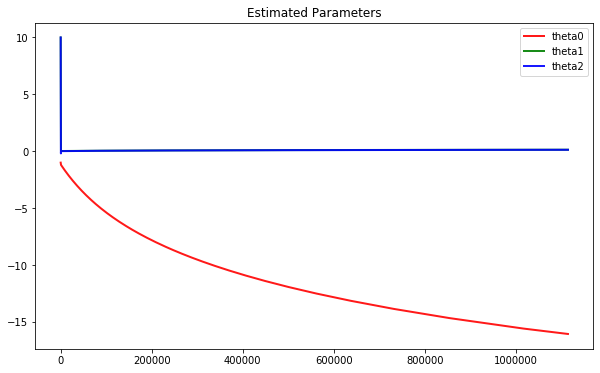

th0: -16.060592651367188 
th1: 0.1335608959197998 
th2: 0.1278471052646637


In [13]:
# 2. Plot the estimated parameters using the training dataset

plt.figure(figsize=(10, 6))
plot0, = plt.plot(epoch_log,th0_log, color='red',linewidth= 2,alpha=0.9)
plot1, = plt.plot(epoch_log,th1_log, color='green',linewidth= 2,alpha=0.9)
plot2, = plt.plot(epoch_log,th2_log, color='blue',linewidth= 2,alpha=0.9)

plt.title("Estimated Parameters") 
plt.legend([plot0,plot1,plot2],["theta0","theta1",'theta2'])

plt.show()


print("th0:",th0_log[-1].item(),"\nth1:",th1_log[-1].item(),"\nth2:",th2_log[-1].item())

Converged Training loss : 0.22128


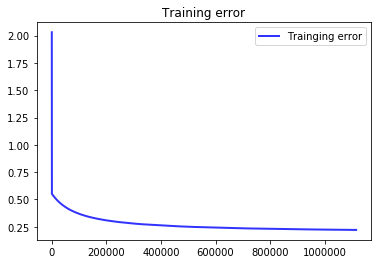

In [14]:
# 3. Plot the training error using the training dataset
plt.title("Training error")
plot, = plt.plot(epoch_log,loss_log, color='blue',linewidth=2,alpha=0.8)
plt.legend([plot],["Trainging error"])
print("Converged Training loss : {:.5f}".format(loss_log[-1].item()))

In [18]:
import collections

th0 = th0_log[-1]
th1 = th1_log[-1]
th2 = th2_log[-1]

# Get -30:30:0.1 tensor
xs = torch.linspace(start=30,end=100,steps=141,device='cuda')
ys = torch.linspace(start=30,end=100,steps=141,device='cuda')
datas = []

for x in xs.cpu().numpy() :
    for y in ys.cpu().numpy():
        z = th0 + th1*x + th2*y
        activ = 1 / (1 + torch.exp(z))
        if activ >= 0.5 :
            datas.append([x,y,(activ.item(),0,1-activ.item()) ])
        else :
            datas.append([x,y,(activ.item(),0,1-activ.item()) ])


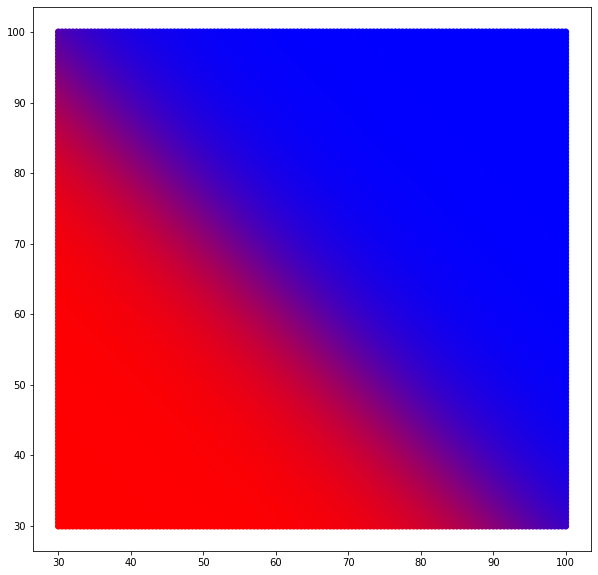

In [19]:
datas = np.array(datas)
xs = datas[:,0]
ys = datas[:,1]
colors = datas[:,2]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xs,ys,color=colors)
plt.show()